# Tau Leaping Solver

### Imports

In [1]:
import sys
import os
import numpy
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../../')))
import gillespy2
from gillespy2 import TauLeapingSolver

**From:** Vilar, José M. G. et al. “Mechanisms of noise-resistance in genetic oscillators.” PNAS, vol. 99 no. 9, 2002, pp. 5988-5992., doi.org/10.1073/pnas.092133899.

### Model Instantiation

Model must include rates, species, and reactions

In [2]:
class VilarOscillator(gillespy2.Model):
    def __init__(self, parameter_values=None):
        gillespy2.Model.__init__(self, name="VilarOscillator")
        self.volume = 1

        # Parameters
        alphaA = gillespy2.Parameter(name="alphaA", expression=50)
        alphaA_prime = gillespy2.Parameter(name="alphaA_prime", expression=500)
        alphaR = gillespy2.Parameter(name="alphaR", expression=0.01)
        alphaR_prime = gillespy2.Parameter(name="alphaR_prime", expression=50)
        betaA = gillespy2.Parameter(name="betaA", expression=50)
        betaR = gillespy2.Parameter(name="betaR", expression=5)
        deltaMA = gillespy2.Parameter(name="deltaMA", expression=10)
        deltaMR = gillespy2.Parameter(name="deltaMR", expression=0.5)
        deltaA = gillespy2.Parameter(name="deltaA", expression=1)
        deltaR = gillespy2.Parameter(name="deltaR", expression=0.2)
        gammaA = gillespy2.Parameter(name="gammaA", expression=1)
        gammaR = gillespy2.Parameter(name="gammaR", expression=1)
        gammaC = gillespy2.Parameter(name="gammaC", expression=2)
        thetaA = gillespy2.Parameter(name="thetaA", expression=50)
        thetaR = gillespy2.Parameter(name="thetaR", expression=100)
        
        self.add_parameter([alphaA, alphaA_prime, alphaR, alphaR_prime, betaA, betaR,
                            deltaMA, deltaMR, deltaA, deltaR, gammaA, gammaR, gammaC,
                            thetaA, thetaR])

        # Species
        Da = gillespy2.Species(name="Da", initial_value=1, mode="discrete")
        Da_prime = gillespy2.Species(name="Da_prime", initial_value=0, mode="discrete")
        Ma = gillespy2.Species(name="Ma", initial_value=0, mode="discrete")
        Dr = gillespy2.Species(name="Dr", initial_value=1, mode="discrete")
        Dr_prime = gillespy2.Species(name="Dr_prime", initial_value=0, mode="discrete")
        Mr = gillespy2.Species(name="Mr", initial_value=0, mode="discrete")
        C = gillespy2.Species(name="C", initial_value=0, mode="discrete")
        A = gillespy2.Species(name="A", initial_value=0, mode="discrete")
        R = gillespy2.Species(name="R", initial_value=0, mode="discrete")
        
        self.add_species([Da, Da_prime, Ma, Dr, Dr_prime, Mr, C, A, R])

        # Reactions
        r1 = gillespy2.Reaction(name="r1", reactants={'A': 1, 'R': 1}, products={'C': 1}, rate="gammaC")
        r2 = gillespy2.Reaction(name="r2", reactants={'A': 1}, products={}, rate="deltaA")
        r3 = gillespy2.Reaction(name="r3", reactants={'C': 1}, products={'R': 1}, rate="deltaA")
        r4 = gillespy2.Reaction(name="r4", reactants={'R': 1}, products={}, rate="deltaR")
        r5 = gillespy2.Reaction(name="r5", reactants={'A': 1, 'Da': 1}, products={'Da_prime': 1}, rate="gammaA")
        r6 = gillespy2.Reaction(name="r6", reactants={'Da_prime': 1}, products={'A': 1, 'Da': 1}, rate="thetaA")
        r7 = gillespy2.Reaction(name="r7", reactants={'Da': 1}, products={'Da': 1, 'Ma': 1}, rate="alphaA")
        r8 = gillespy2.Reaction(name="r8", reactants={'Da_prime': 1}, products={'Da_prime': 1, 'Ma': 1}, rate="alphaA_prime")
        r9 = gillespy2.Reaction(name="r9", reactants={'Ma': 1}, products={}, rate="deltaMA")
        r10 = gillespy2.Reaction(name="r10", reactants={'Ma': 1}, products={'A': 1, 'Ma': 1}, rate="betaA")
        r11 = gillespy2.Reaction(name="r11", reactants={'A': 1, 'Dr': 1}, products={'Dr_prime': 1}, rate="gammaR")
        r12 = gillespy2.Reaction(name="r12", reactants={'Dr_prime': 1}, products={'A': 1, 'Dr': 1}, rate="thetaR")
        r13 = gillespy2.Reaction(name="r13", reactants={'Dr': 1}, products={'Dr': 1, 'Mr': 1}, rate="alphaR")
        r14 = gillespy2.Reaction(name="r14", reactants={'Dr_prime': 1}, products={'Dr_prime': 1, 'Mr': 1}, rate="alphaR_prime")
        r15 = gillespy2.Reaction(name="r15", reactants={'Mr': 1}, products={}, rate="deltaMR")
        r16 = gillespy2.Reaction(name="r16", reactants={'Mr': 1}, products={'Mr': 1, 'R': 1}, rate="betaR")
        
        self.add_reaction([r1, r2, r3, r4, r5, r6, r7, r8, r9,
                           r10, r11, r12, r13, r14, r15, r16])

        # Timespan
        self.timespan(numpy.linspace(0,200,201))

In [3]:
model = VilarOscillator()

### Run Model and plot
Run the model by calling the run function on the model and select solver via 'solver' keyword argument.  if show_labels is True, results are returned as a list of dictionaries, where the list index is the trajectory run index, and dictionary keys are comprised of species names and 'time'.  If show_labels is False, results are returned as a numpy array with indices [trajectory][timestep][species_no]

In [4]:
%time results = model.run(solver=TauLeapingSolver())

CPU times: user 36.2 s, sys: 113 ms, total: 36.3 s
Wall time: 36.5 s


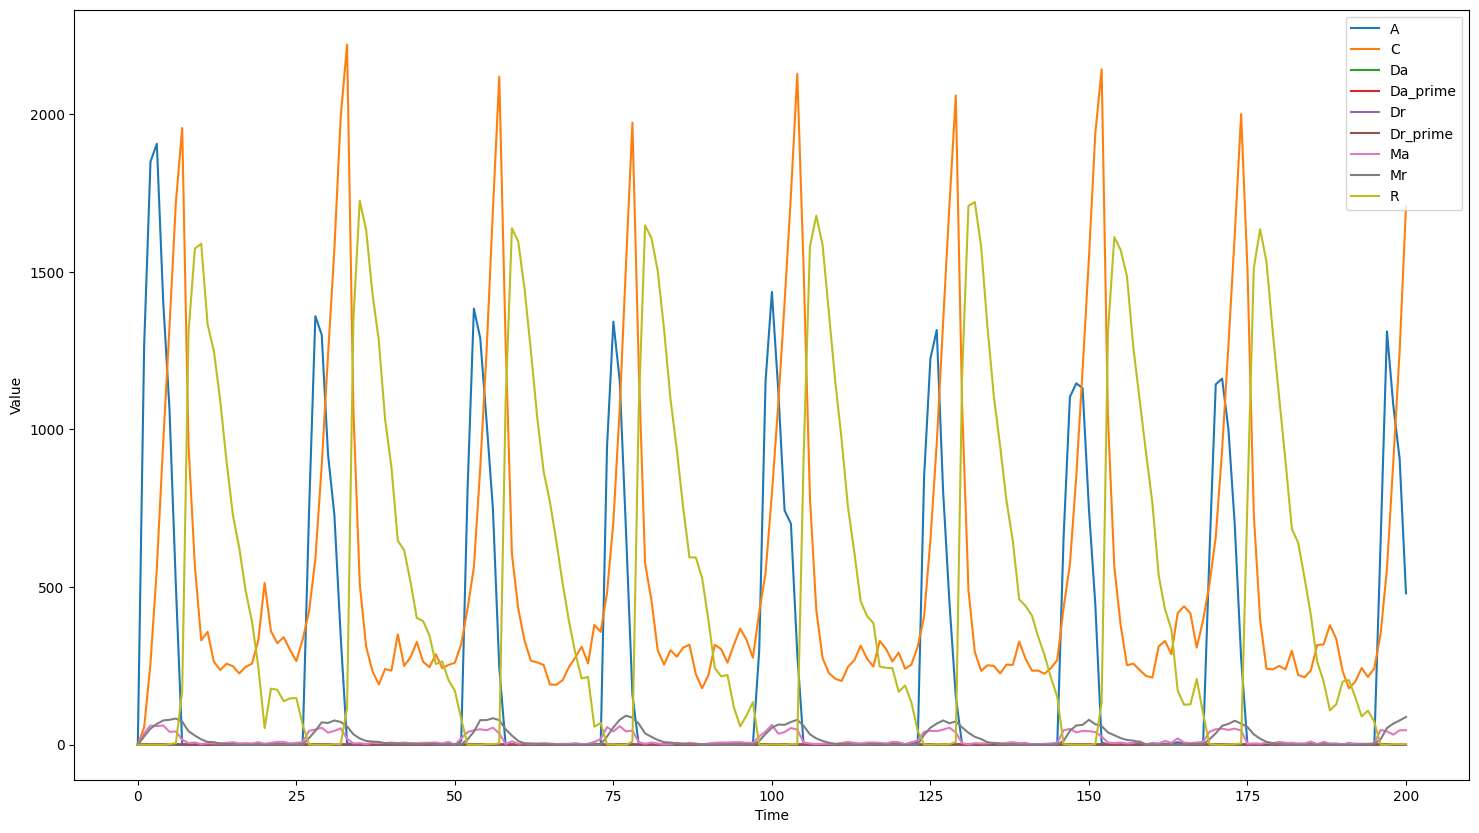

In [5]:
results.plot()